In [26]:
import torch
from common import k_means_clustering, visualize_2d, visualize_3d

In [27]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "8"  # to avoid warning from sklearn  

## Generate data

### Generators

In [28]:
def tensor_generator(shape, distribution='normal'):
    while True:
        if distribution == 'normal':
            yield torch.randn(shape)
        elif distribution == 'uniform':
            yield torch.rand(shape)
        else:
            raise ValueError(f'Unknown distribution: {distribution}')

In [29]:
def noise_generator(centroid, std=0.1):
    while True:
        yield centroid + torch.randn_like(centroid) * std

In [30]:
def generate_data(shape, n_centroids, n_samples, std, distribution):
    centroid_generator = tensor_generator(shape, distribution)
    centroids = [next(centroid_generator) for _ in range(n_centroids)]

    noise_generators = [noise_generator(centroid, std) for centroid in centroids]

    noisy_tensors = torch.stack([next(noise_generators[i % n_centroids]) for i in range(n_samples)])

    return noisy_tensors, centroids

## Clustering

### Hyperparameters

In [31]:
N_CENTROIDS = 10
N = 9000
STD = 0.5
SHAPE = (512)
DIST = 'uniform'

In [32]:
noisy_tensors, centroids = generate_data(SHAPE, N_CENTROIDS, N, STD, DIST)

In [33]:
N_CLUSTERS = 5
labels = k_means_clustering(noisy_tensors, N_CLUSTERS)

## Visualization

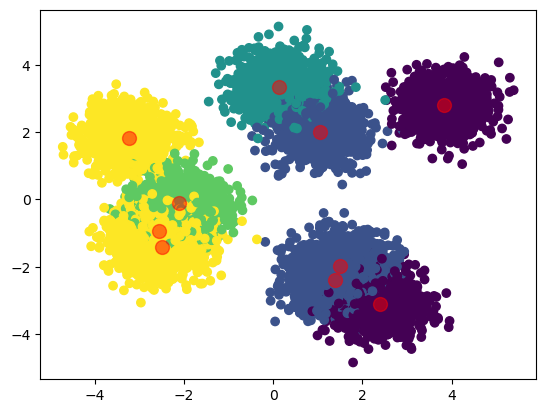

In [34]:
visualize_2d(noisy_tensors, centroids, labels)

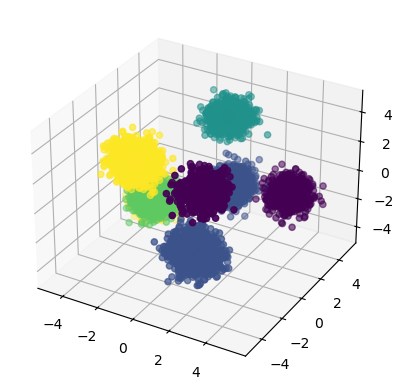

In [35]:
visualize_3d(noisy_tensors, centroids, labels)